# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

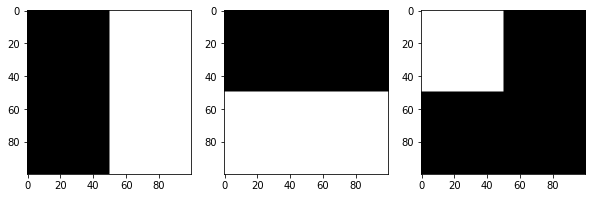

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


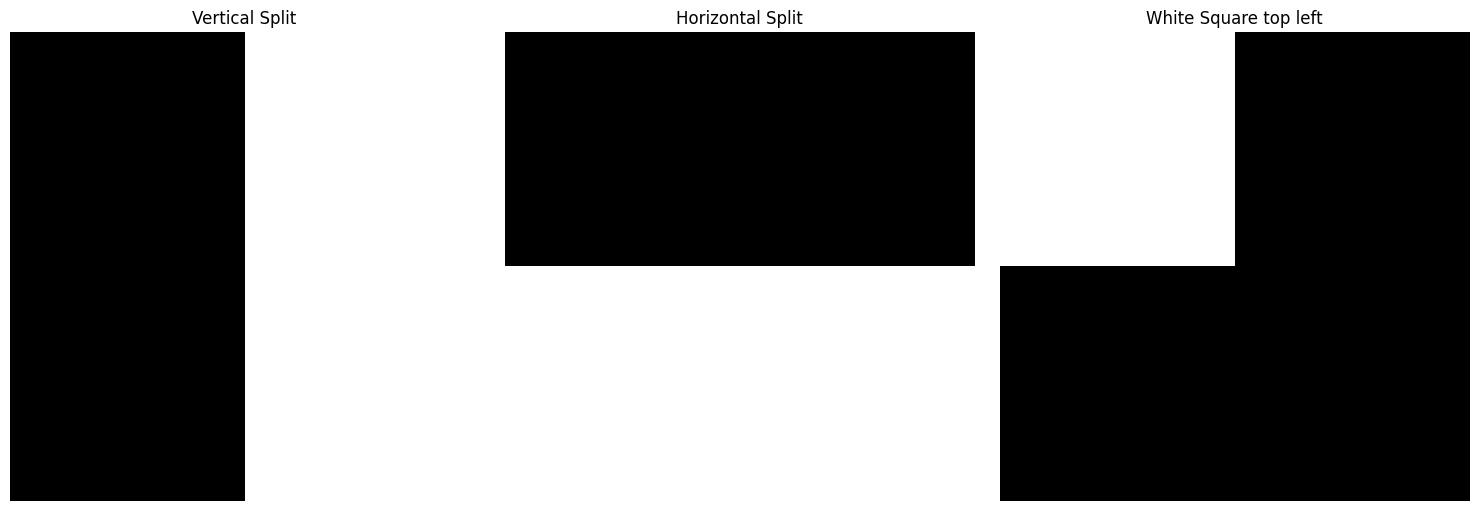

Image 1 shape: (100, 100)
Image 2 shape: (100, 100)
Image 3 shape: (100, 100)
All images are 100x100: True


In [5]:
# solution
# create 100x100 images from each pattern

#Pattern1: Black left half, white right half
image1 = np.zeros((100, 100), dtype=np.uint8)
image1[:, 50:] = 255

#pattern2: White left half, black right half
image2 = np.zeros((100, 100), dtype=np.uint8)
image2[50:, :] = 255

# Pattern3: White square in the toip left corner
image3 = np.zeros((100, 100), dtype=np.uint8)
image3[:50, :50] = 255

#visualize the created images in a 1 x 3 subplot using matplotlib
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Display first image
axes[0].imshow(image1, cmap='gray', vmin=0, vmax=1)
axes[0].set_title('Vertical Split')
axes[0].axis('off')

# Display second image  
axes[1].imshow(image2, cmap='gray', vmin=0, vmax=1)
axes[1].set_title('Horizontal Split')
axes[1].axis('off')

# Display third image
axes[2].imshow(image3, cmap='gray', vmin=0, vmax=1)
axes[2].set_title('White Square top left')
axes[2].axis('off')


plt.tight_layout()
plt.show()

# Print information about the created images
print(f"Image 1 shape: {image1.shape}")
print(f"Image 2 shape: {image2.shape}")  
print(f"Image 3 shape: {image3.shape}")
print(f"All images are 100x100: {all(img.shape == (100, 100) for img in [image1, image2, image3])}")



*   Use the above three images to create the following image

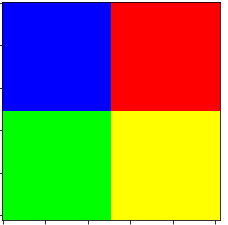
*Hint: Remember channels and color spaces*

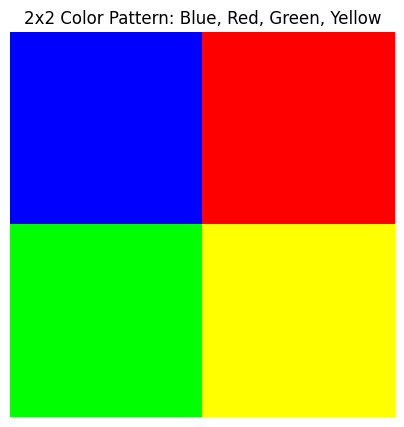

RGB values in each quadrant:
Top-left (Blue): [0. 0. 1.]
Top-right (Red): [1. 0. 0.]
Bottom-left (Green): [0. 1. 0.]
Bottom-right (Yellow): [1. 1. 0.]


In [6]:
Red_channel = np.zeros((100, 100))
Red_channel[:, 50:] = 1  # Right half = 1

Green_channel = np.zeros((100, 100))
Green_channel[50:, :] = 1  # Bottom half = 1

Blue_channel = np.zeros((100, 100))
Blue_channel[:50, :50] = 1  # Top-left quadrant = 1

# Combine into RGB image
color_image = np.stack([Red_channel, Green_channel, Blue_channel], axis=2)

# Display the result
plt.figure(figsize=(5, 5))
plt.imshow(color_image)
plt.title('2x2 Color Pattern: Blue, Red, Green, Yellow')
plt.axis('off')
plt.show()

print("RGB values in each quadrant:")
print(f"Top-left (Blue): {color_image[25, 25]}")
print(f"Top-right (Red): {color_image[25, 75]}")  
print(f"Bottom-left (Green): {color_image[75, 25]}")
print(f"Bottom-right (Yellow): {color_image[75, 75]}")


### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

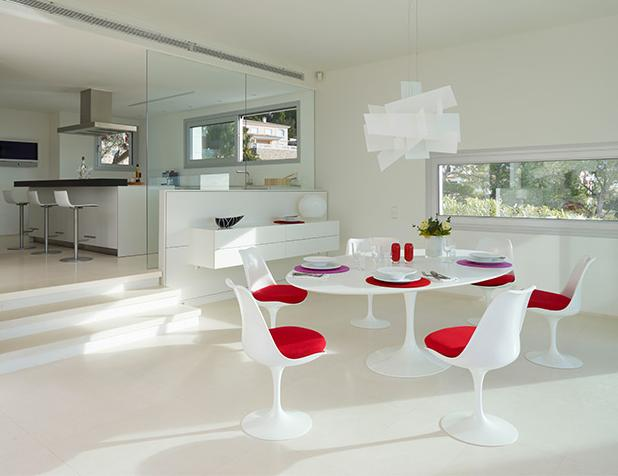

*   Extract individual channels and plot them using matplotlib subplot.



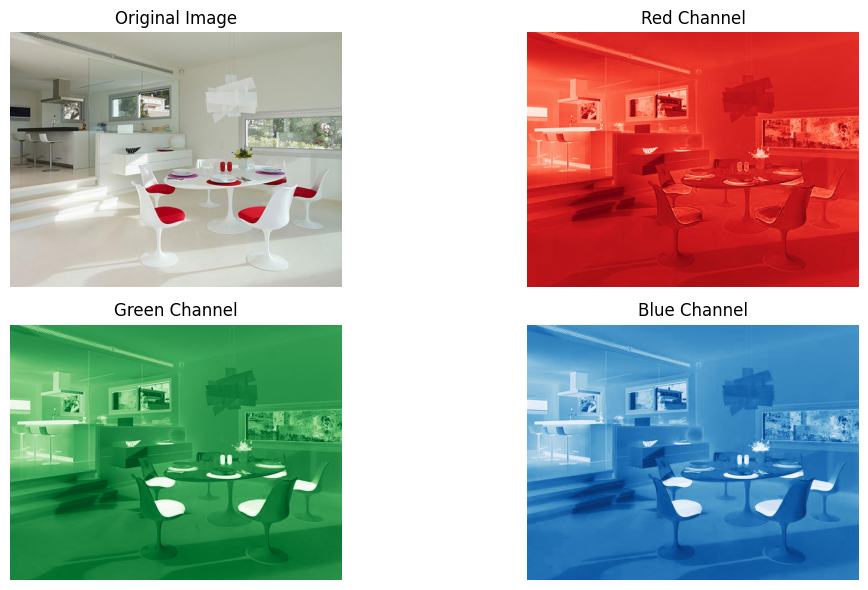

Image shape: (476, 618, 3)
Image dtype: uint8
Red channel range: 0 - 255
Green channel range: 0 - 255
Blue channel range: 0 - 255


In [16]:
# solution
# Read the image 'sillas.jpg' from the images folder
image = io.imread('images/sillas.jpg')

# Extract individual RGB channels
red_channel = image[:, :, 0]    # R channel
green_channel = image[:, :, 1]  # G channel  
blue_channel = image[:, :, 2]   # B channel

# Extract individual channels and plot them using matplotlib subplot
fig, axes = plt.subplots(2, 2, figsize=(12 , 6))

# Display original image
axes[0, 0].imshow(image)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

# Display Red channel
axes[0, 1].imshow(red_channel, cmap='Reds')
axes[0, 1].set_title('Red Channel')
axes[0, 1].axis('off')

# Display Green channel
axes[1, 0].imshow(green_channel, cmap='Greens')
axes[1, 0].set_title('Green Channel')
axes[1, 0].axis('off')

# Display Blue channel
axes[1, 1].imshow(blue_channel, cmap='Blues')
axes[1, 1].set_title('Blue Channel')
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Print image information
print(f"Image shape: {image.shape}")
print(f"Image dtype: {image.dtype}")
print(f"Red channel range: {red_channel.min()} - {red_channel.max()}")
print(f"Green channel range: {green_channel.min()} - {green_channel.max()}")
print(f"Blue channel range: {blue_channel.min()} - {blue_channel.max()}")





*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

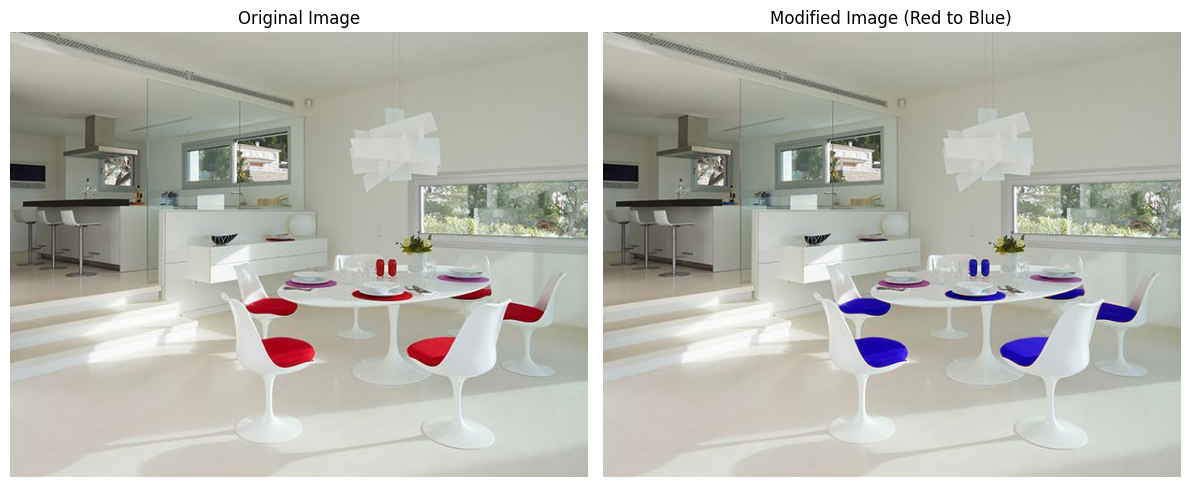

Number of pixels identified as 'red': 5284
Percentage of image changed: 1.80%


In [21]:
# solution
# Create a new image where everything that is 'red' is changed to 'blue'

modified_image = image.copy()

red_threshold = 50  # minimum red value to consider
dominance_factor = 1.3  # how much red should dominate other channels

# Create a mask for red pixels
red_mask = (image[:, :, 0] > red_threshold) & \
           (image[:, :, 0] > dominance_factor * image[:, :, 1]) & \
           (image[:, :, 0] > dominance_factor * image[:, :, 2])
           
# Change red pixels to blue
modified_image[red_mask, 0] = image[red_mask, 2]  # Red channel gets original blue values
modified_image[red_mask, 1] = image[red_mask, 1]  # Keep green channel
modified_image[red_mask, 2] = image[red_mask, 0]  # Blue channel gets original red values

# Visualize the original image and the created image using matplotlib subplot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the modified image
axes[1].imshow(modified_image)
axes[1].set_title('Modified Image (Red to Blue)')
axes[1].axis('off')


plt.tight_layout()
plt.show()

# Show some statistics about the change
print(f"Number of pixels identified as 'red': {np.sum(red_mask)}")
print(f"Percentage of image changed: {(np.sum(red_mask) / (image.shape[0] * image.shape[1])) * 100:.2f}%")




# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

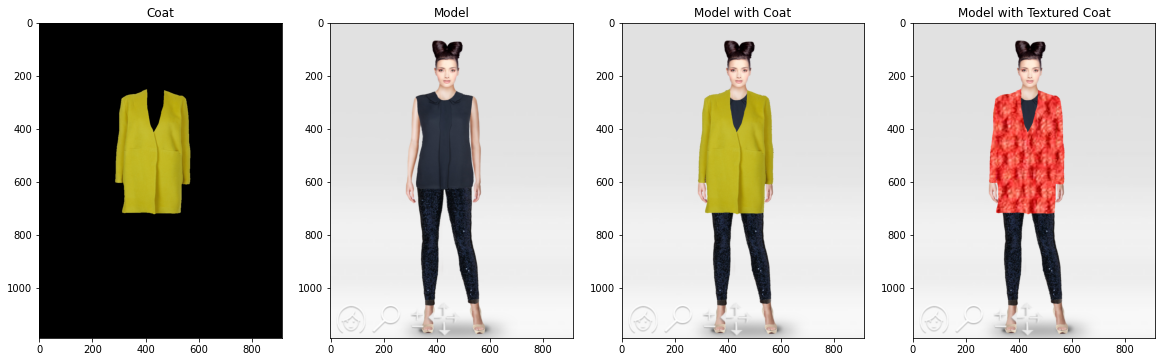

Model image shape: (1188, 915, 4)
Coat image shape: (1188, 915, 4)
Converted model image from RGBA to RGB
Converted coat image from RGBA to RGB
Final model image shape: (1188, 915, 3)
Final coat image shape: (1188, 915, 3)


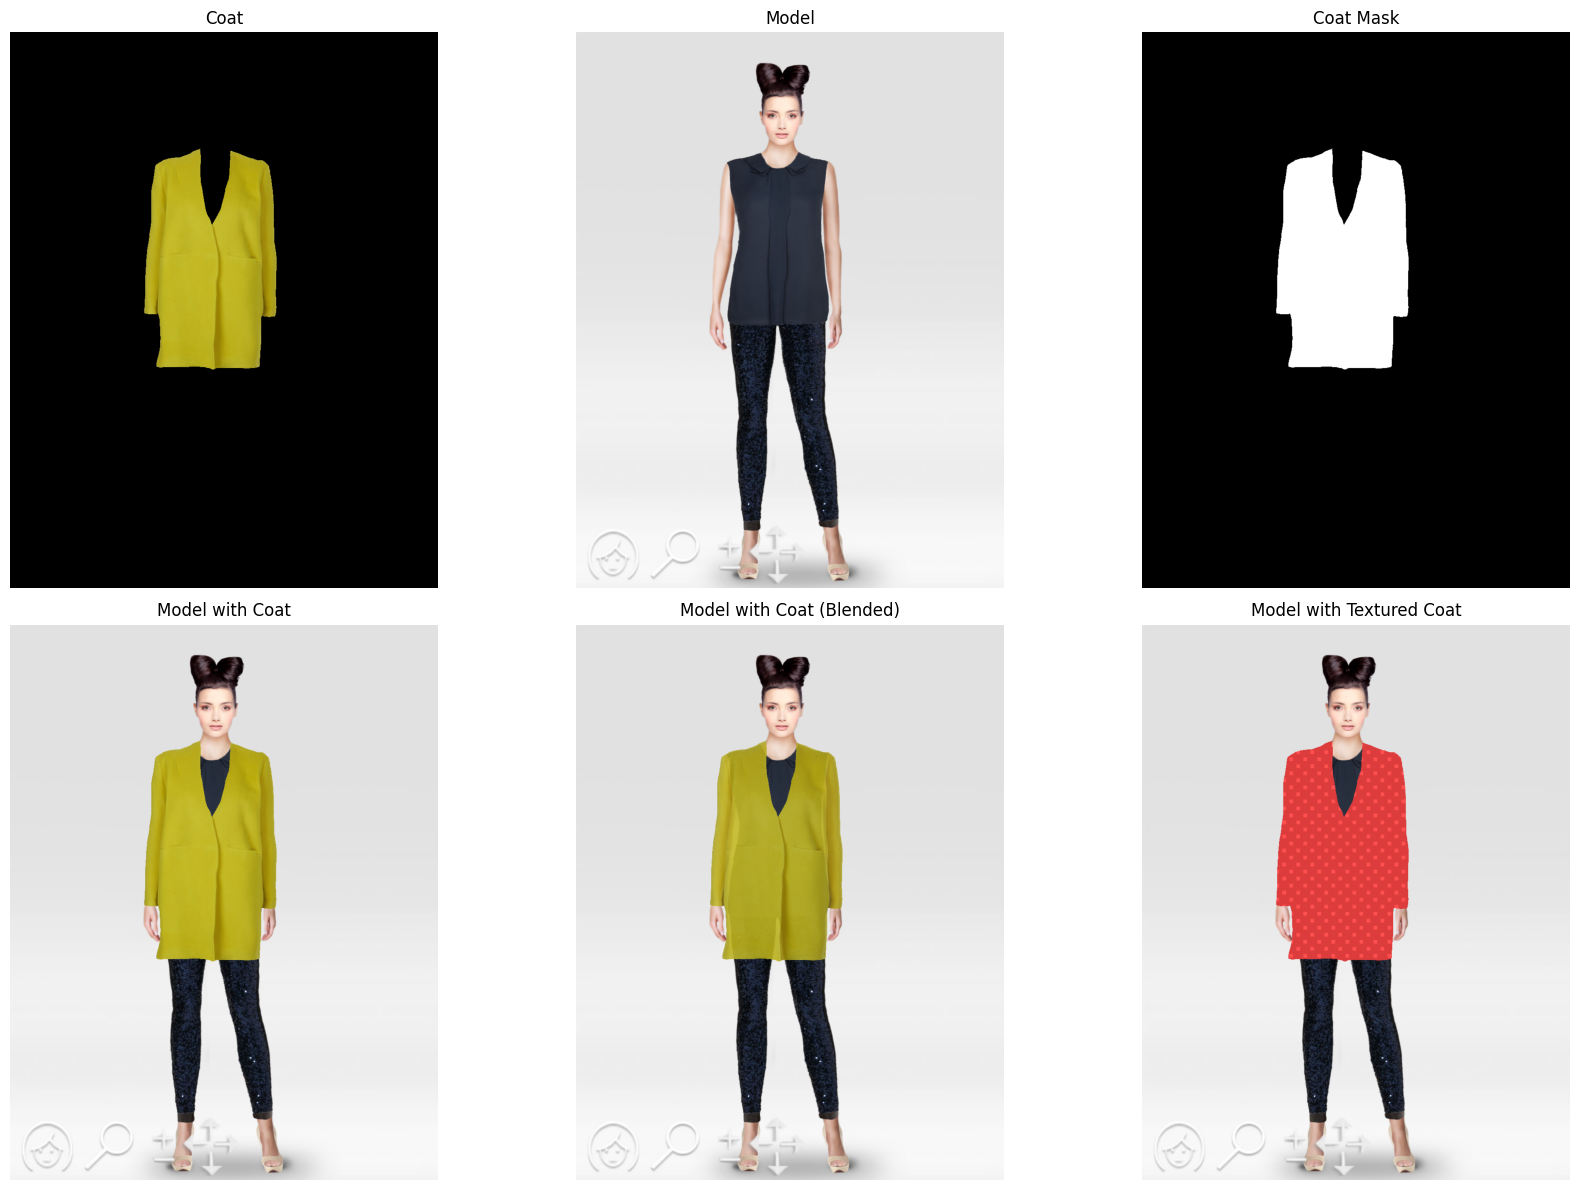

Mask covers 108320 pixels (10.0% of image)


In [24]:
# solution
# Load the model and coat images

model_img = io.imread('images/model.png')
coat_img = io.imread('images/coat.png')

print(f"Model image shape: {model_img.shape}")
print(f"Coat image shape: {coat_img.shape}")

# Convert RGBA to RGB if needed (remove alpha channel)
if model_img.shape[2] == 4:
    model_img = model_img[:, :, :3]  # Keep only RGB channels
    print("Converted model image from RGBA to RGB")

if coat_img.shape[2] == 4:
    coat_img = coat_img[:, :, :3]  # Keep only RGB channels
    print("Converted coat image from RGBA to RGB")

# Ensure both images have the same dimensions
if model_img.shape != coat_img.shape:
    print(f"Resizing images to match...")
    from skimage.transform import resize
    # Resize coat to match model dimensions
    coat_img = resize(coat_img, model_img.shape, preserve_range=True).astype(np.uint8)

print(f"Final model image shape: {model_img.shape}")
print(f"Final coat image shape: {coat_img.shape}")

# Create a mask from the coat image
# The mask should be True where the coat exists (non-black/non-transparent areas)
coat_gray = np.mean(coat_img, axis=2)  # Convert to grayscale
coat_mask = coat_gray > 20  # Threshold to create binary mask

# Method 1: Simple overlay - replace model pixels with coat pixels where coat exists
model_with_coat = model_img.copy()
model_with_coat[coat_mask] = coat_img[coat_mask]

# Method 2: Create 3D mask for RGB channels for more complex operations
coat_mask_3d = np.stack([coat_mask, coat_mask, coat_mask], axis=2)

# Alpha blending approach
alpha = 0.9  # Coat opacity
model_with_coat_blended = model_img.copy().astype(float)
model_with_coat_blended[coat_mask_3d] = (
    alpha * coat_img[coat_mask_3d].astype(float) + 
    (1 - alpha) * model_img[coat_mask_3d].astype(float)
)
model_with_coat_blended = np.clip(model_with_coat_blended, 0, 255).astype(np.uint8)

# Create a textured coat (red pattern example)
textured_coat = coat_img.copy()

# Create red texture pattern
red_pattern = np.zeros_like(coat_img)
red_pattern[:, :, 0] = 220  # Red channel
red_pattern[:, :, 1] = 60   # Green channel  
red_pattern[:, :, 2] = 60   # Blue channel

# Add some diagonal stripes pattern
for i in range(0, red_pattern.shape[0], 15):
    for j in range(0, red_pattern.shape[1], 15):
        if (i + j) % 30 < 15:
            red_pattern[i:i+8, j:j+8] = [255, 80, 80]  # Lighter red

# Apply texture only to coat areas
textured_coat[coat_mask] = red_pattern[coat_mask]

# Create model with textured coat
model_with_textured_coat = model_img.copy()
model_with_textured_coat[coat_mask] = textured_coat[coat_mask]

# Visualize all results
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Top row
axes[0, 0].imshow(coat_img)
axes[0, 0].set_title('Coat')
axes[0, 0].axis('off')

axes[0, 1].imshow(model_img)
axes[0, 1].set_title('Model')
axes[0, 1].axis('off')

axes[0, 2].imshow(coat_mask, cmap='gray')
axes[0, 2].set_title('Coat Mask')
axes[0, 2].axis('off')

# Bottom row
axes[1, 0].imshow(model_with_coat)
axes[1, 0].set_title('Model with Coat')
axes[1, 0].axis('off')

axes[1, 1].imshow(model_with_coat_blended)
axes[1, 1].set_title('Model with Coat (Blended)')
axes[1, 1].axis('off')

axes[1, 2].imshow(model_with_textured_coat)
axes[1, 2].set_title('Model with Textured Coat')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

print(f"Mask covers {np.sum(coat_mask)} pixels ({np.sum(coat_mask)/coat_mask.size*100:.1f}% of image)")





# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




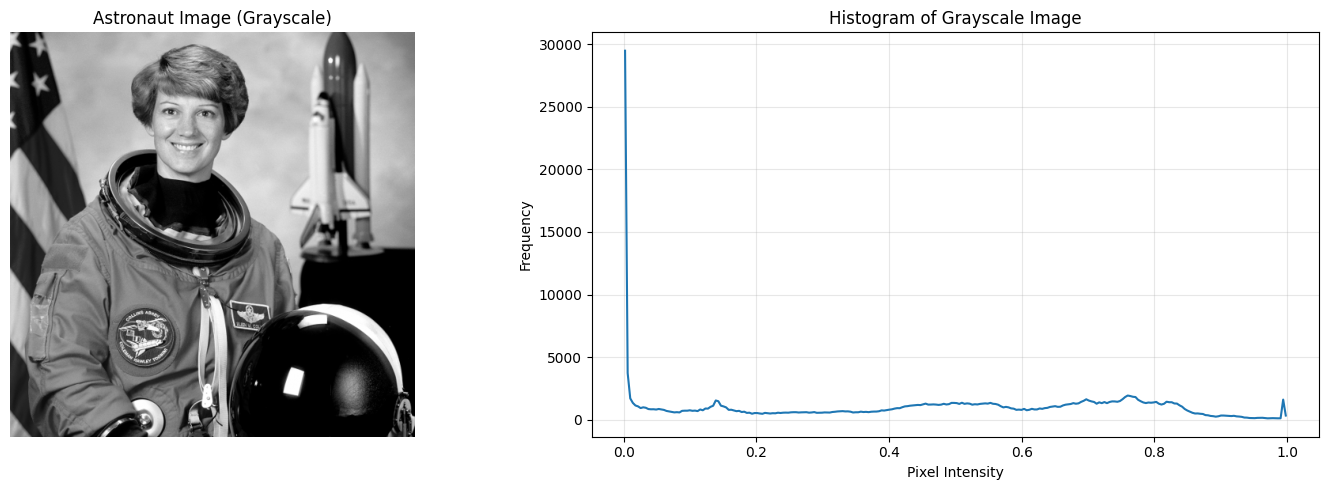

Image shape: (512, 512)
Image dtype: float64
Pixel value range: 0.000 to 1.000
Number of histogram bins: 256
Total pixels: 262144


In [25]:
# solution
# Read the 'astronaut' image from data module
astronaut_img = data.astronaut()

# Convert the image to grayscale
from skimage.color import rgb2gray
astronaut_gray = rgb2gray(astronaut_img)

# Compute the histogram of the image using skimage.exposure
hist, bins = exposure.histogram(astronaut_gray)

# Plot the histogram using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Display the grayscale image
axes[0].imshow(astronaut_gray, cmap='gray')
axes[0].set_title('Astronaut Image (Grayscale)')
axes[0].axis('off')

# Plot the histogram
axes[1].plot(bins, hist)
axes[1].set_title('Histogram of Grayscale Image')
axes[1].set_xlabel('Pixel Intensity')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print some statistics about the image and histogram
print(f"Image shape: {astronaut_gray.shape}")
print(f"Image dtype: {astronaut_gray.dtype}")
print(f"Pixel value range: {astronaut_gray.min():.3f} to {astronaut_gray.max():.3f}")
print(f"Number of histogram bins: {len(bins)}")
print(f"Total pixels: {np.sum(hist)}")


*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

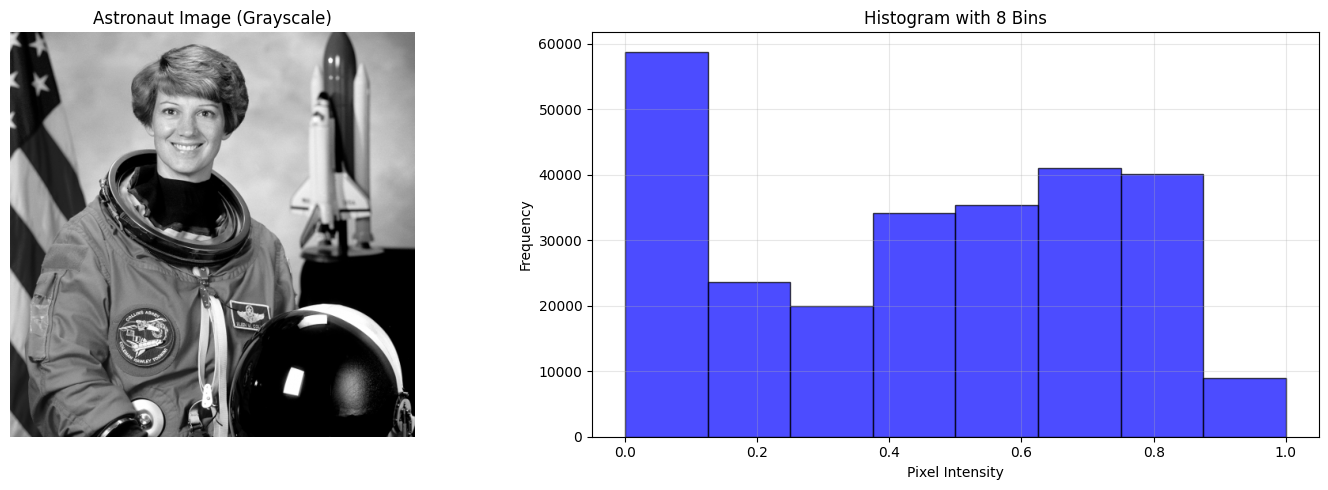

Histogram frequencies: [58836. 23679. 19936. 34163. 35337. 41039. 40211.  8943.]
Bin edges: [0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


In [28]:
# solution

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Display the grayscale image
axes[0].imshow(astronaut_gray, cmap='gray')
axes[0].set_title('Astronaut Image (Grayscale)')
axes[0].axis('off')

# Plot histogram using matplotlib (automatically handles bin edges)
counts, bins, patches = axes[1].hist(astronaut_gray.flatten(), bins=8, 
                                   alpha=0.7, color='blue', edgecolor='black')
axes[1].set_title('Histogram with 8 Bins')
axes[1].set_xlabel('Pixel Intensity')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Histogram frequencies: {counts}")
print(f"Bin edges: {bins}")




*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?



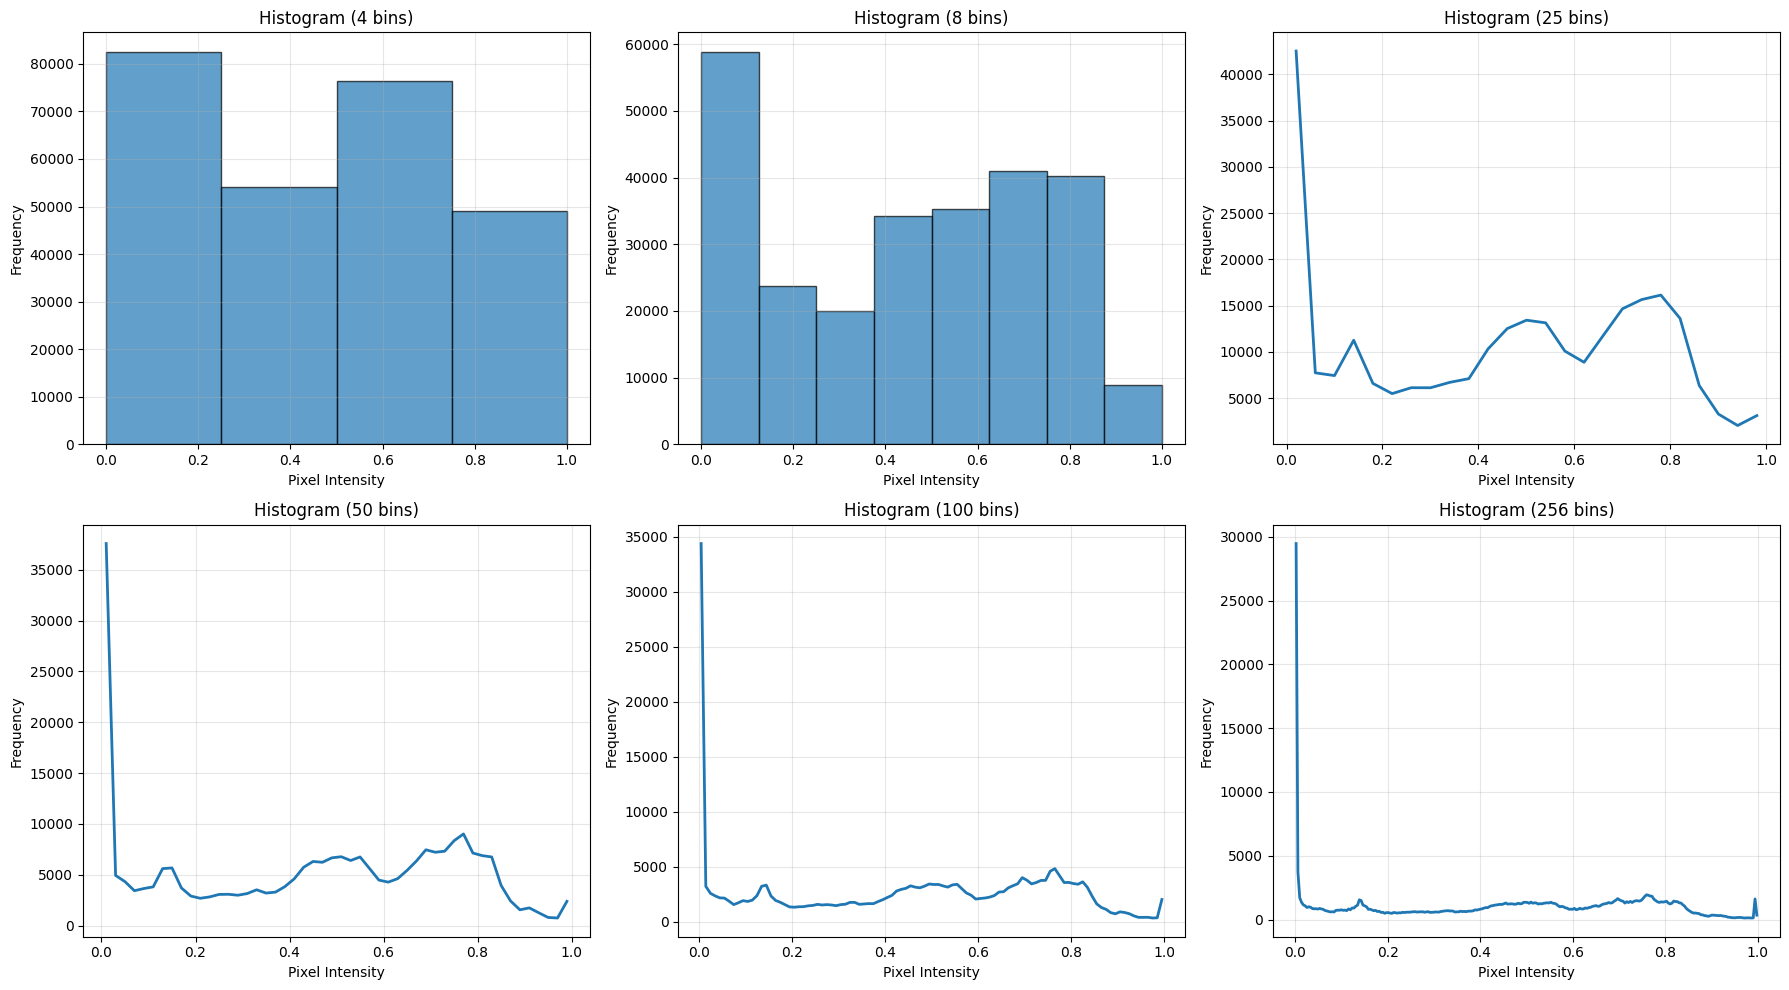

In [29]:
# Compare different bin counts
bin_counts = [4, 8, 25, 50, 100, 256]
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, nbins in enumerate(bin_counts):
    if nbins <= 10:
        # Use matplotlib's hist for low bin counts (easier to handle)
        counts, bins, _ = axes[i].hist(astronaut_gray.flatten(), bins=nbins, 
                                     alpha=0.7, edgecolor='black')
    else:
        # Use skimage histogram for high bin counts
        hist_temp, bins_temp = exposure.histogram(astronaut_gray, nbins=nbins)
        axes[i].plot(bins_temp, hist_temp, linewidth=2)
    
    axes[i].set_title(f'Histogram ({nbins} bins)')
    axes[i].set_xlabel('Pixel Intensity')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Key takeaway: Choose bin count based on your analysis needs - use fewer bins for general trends, moderate bins for balanced analysis, and avoid extremes that either oversimplify or introduce noise.